In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('/Users/arc/Downloads/height-weight (1).csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


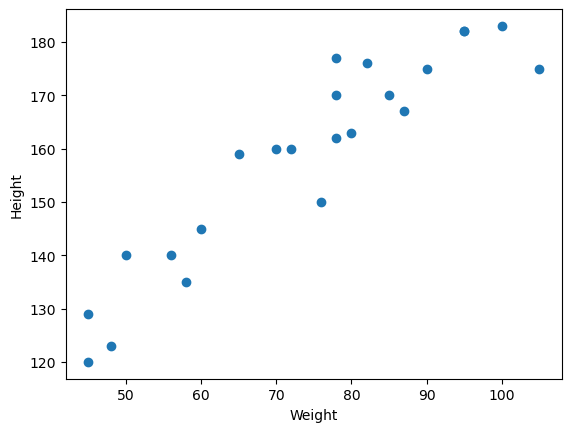

In [4]:
##scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

In [5]:
##Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


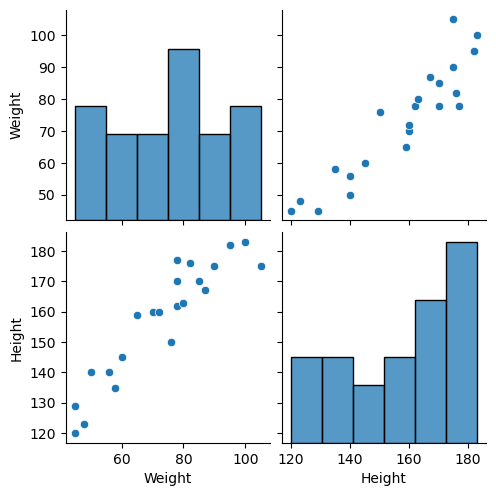

In [6]:
##Seaborn for visualisation
import seaborn as sns
sns.pairplot(df)
plt.show()

In [7]:
##Independent and Dependent features
X=df[['Weight']]##Independent features should be data frame or 2 dimensional array
Y=df['Height']##Dependent variable can be in series or 1d array


In [8]:
X_series=df['Weight']
np.array(X_series).shape

(23,)

In [9]:
np.array(Y).shape

(23,)

In [10]:
##Train Test Split
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [12]:
X_train.shape

(17, 1)

In [13]:
##Standardization
from sklearn.preprocessing import StandardScaler

In [14]:
scaler=StandardScaler()
scaler.fit_transform(X_train)

array([[-0.87662801],
       [ 1.66773133],
       [ 0.33497168],
       [-1.48242785],
       [ 1.36483141],
       [-1.6641678 ],
       [-0.75546804],
       [-0.1496682 ],
       [ 0.21381171],
       [-1.36126788],
       [-0.99778797],
       [-0.02850823],
       [ 1.06193149],
       [ 0.57729161],
       [ 0.75903157],
       [ 0.88019153],
       [ 0.45613165]])

In [15]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)

In [16]:
##we use transform not fit_transform for test data because we dont want train data know about test data(to prevent leakage)

X_test=scaler.transform(X_test)


In [17]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [18]:
##Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression


In [19]:
regression=LinearRegression(n_jobs=-1)

In [20]:
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [21]:
print("Coefficient or slope: ",regression.coef_)
print("Intercept: ",regression.intercept_)

Coefficient or slope:  [17.2982057]
Intercept:  156.47058823529412


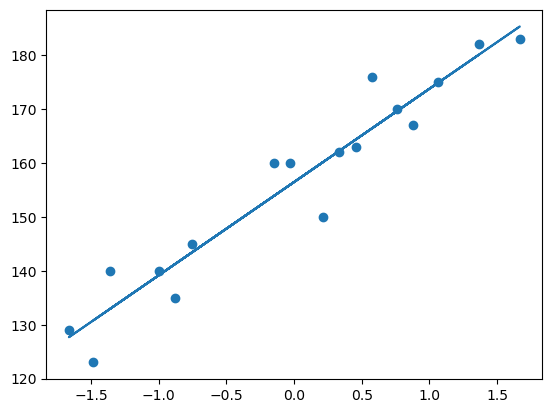

In [22]:
##plot Training data plot best fit line
plt.scatter(X_train,Y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [23]:
###Prediction of test data
##predicted height output= intercept +coef_(Weight)
##Y_pred_test=156.470 + 17.29(X_test)

In [24]:
Y_pred=regression.predict(X_test)

In [25]:
Y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [26]:
##Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [27]:
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [28]:
## R-square
from sklearn.metrics import r2_score

In [29]:
score=r2_score(Y_test,Y_pred)
print(score)

0.7360826717981276


In [30]:
#adjusted R-squared
1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

0.6701033397476595

In [31]:
## OLS Linear Regression
import statsmodels.api as sm

In [32]:
model=sm.OLS(Y_train,X_train).fit()

In [33]:
prediction=model.predict(X_test)
print(prediction)

[  5.79440897   5.79440897 -28.78711691  23.60913442  -7.82861638
  34.08838469]


In [34]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Sat, 06 Sep 2025   Prob (F-statistic):                       0.664
Time:                        23:16:58   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/anaconda3/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=17 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [36]:
##Prediction for new data
regression.predict(scaler.transform([[72]]))

/opt/anaconda3/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])

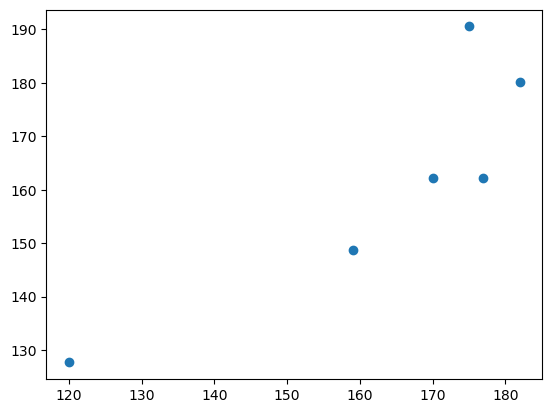

In [39]:
##plot a scatter plot for the prediction
plt.scatter(Y_test,Y_pred)
plt.show()

In [40]:
##residuals
residuals=Y_test-Y_pred
residuals

15    14.735003
9      7.735003
0     -7.683471
8      1.920277
17    10.358028
12   -15.558973
Name: Height, dtype: float64

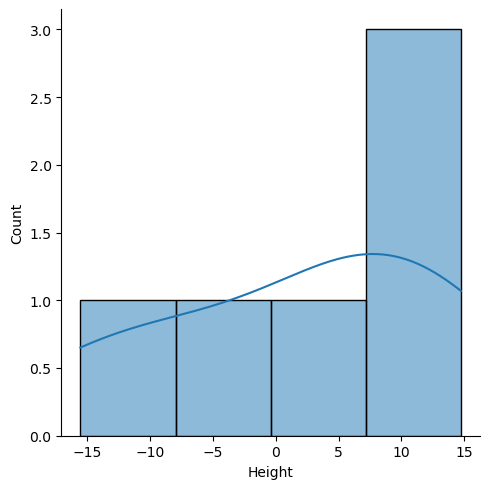

In [43]:
##plot this residuals
sns.displot(residuals,kde=True)
plt.show()

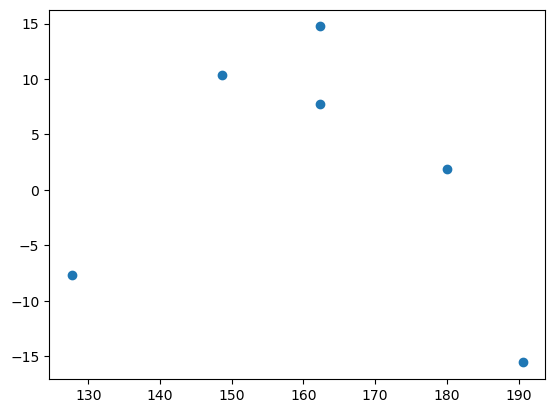

In [44]:
## Scatter plot with respect to prediction and residuals
plt.scatter(Y_pred,residuals)
plt.show()